## The following is an analysis of a job postings dataset that was downloaded from Kaggle.com

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
postings = pd.read_csv('C:\\Users\\Tyler Nardone\\Documents\\Python\\Projects\\Job Postings\\job_dataset.csv')

In [3]:
postings.head()

,job_title,company,job_location,job_summary,post_date,today,job_salary,job_url
0,Technology Lead : Data Science I Machine Learning,Infosys Limited,"Bengaluru, Karnataka",A day in the life of an Infoscion • As part of...,PostedPosted 30+ days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,"Software Engineer, Machine Learning",Google,"Bengaluru, Karnataka",2 years of relevant work experience in machine...,PostedPosted 30+ days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,Experienced Over The Shoulder Mechanic- C17,BOEING,"Remote in Air Force Station, Karnataka",This position will focus on supporting the Boe...,PostedPosted 3 days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,Data Scientist,Infosys Limited,"Bengaluru, Karnataka",Anchor ML development track in a client projec...,PostedPosted 30+ days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,Python Developer,Infosys Limited,"Bengaluru, Karnataka",Should have a decent understanding of the Mach...,PostedPosted 30+ days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...


In [4]:
print(f'This dataset contains {postings.shape[0]} rows and {postings.shape[1]} columns.')

This dataset contains 1583 rows and 8 columns.


In [5]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1583 non-null   object
 1   company       1583 non-null   object
 2   job_location  1583 non-null   object
 3   job_summary   1583 non-null   object
 4   post_date     1583 non-null   object
 5   today         1583 non-null   object
 6   job_salary    405 non-null    object
 7   job_url       1583 non-null   object
dtypes: object(8)
memory usage: 99.1+ KB


In [6]:
postings.describe()

,job_title,company,job_location,job_summary,post_date,today,job_salary,job_url
count,1583,1583,1583,1583,1583,1583,405,1583
unique,965,917,169,1480,80,1,238,1438
top,Data Analyst,Deloitte,"Bengaluru, Karnataka",Acquire data from primary or secondary data so...,Posted30+ days ago,2022-07-26,"₹15,000 - ₹25,000 a month",https://in.indeed.com/company/Memozin-Private-...
freq,200,45,478,7,385,1583,11,3


#### What are some valuable insights we can take away from the above table?
1. Only 80 unique values of "Post Date" seems to suggest many repeat values. This would seem to indicate that many of the 
    jobs were posted on the same day(s).
2. Only 405/1583 or 26% report job salary.

### For the first task, let's see if we can extract "Post Date" column into something easier to deal with. Perhaps transforming to just the integer value would be useful as an input into a machine learning model.

In [7]:
postings['post_date'].unique()

array(['PostedPosted 30+ days ago', 'PostedPosted 3 days ago',
       'EmployerActive 5 days ago', 'PostedPosted 14 days ago',
       'PostedJust posted', 'PostedPosted 1 day ago',
       'PostedPosted 5 days ago', 'PostedPosted 12 days ago',
       'EmployerActive 3 days ago', 'PostedPosted 4 days ago',
       'PostedPosted 19 days ago', 'PostedPosted 7 days ago',
       'PostedPosted 2 days ago', 'Posted30+ days ago',
       'Posted4 days ago', 'Posted10 days ago', 'Hiring ongoing',
       'Posted1 day ago', 'Posted5 days ago', 'EmployerActive 4 days ago',
       'Posted25 days ago', 'Posted7 days ago', 'Posted17 days ago',
       'Posted3 days ago', 'Posted20 days ago', 'Posted12 days ago',
       'PostedToday', 'Posted6 days ago', 'Posted11 days ago',
       'Posted19 days ago', 'Posted21 days ago', 'Employer30+ days ago',
       'Posted9 days ago', 'EmployerActive 11 days ago',
       'PostedPosted 6 days ago', 'EmployerActive 7 days ago',
       'PostedPosted 21 days ago', 'Poste

We are going to assume that "PostedPosted" and "EmployerActive" mean essentially the same thing.

#### First we must verify that every entry is measured in days    

We will create a list of different measurements of time to verify if an entry is measured in anything different than "days". Plural time periods are not needed, for example "day" is found inside of both "day" and "days".

In [8]:
checklist = ['minute', 'hour', 'today', 'day', 'week', 'month', 'year']

The purpose of the following function is to take in a phrase and our checklist, and 
return the words from the checklist that appear in the phrase:

In [9]:
def used_entries(phrase, checklist):
    result = []
    for item in checklist:
        if item in phrase.lower():
            result.append(item)
    return result

Check funtion on a test phrase:

In [10]:
used_entries(postings['post_date'][0] + 'weeks', checklist)

['day', 'week']

#### The function works as expected on a single entry, now we must apply it to the entire post_date column.

In [11]:
postings['post_date_unit'] = postings['post_date'].apply(used_entries, args=(checklist,))

In [12]:
postings['post_date_unit'].head()

0    [day]
1    [day]
2    [day]
3    [day]
4    [day]
Name: post_date_unit, dtype: object

It appears that the majority of entries use measurement units of days, but let's check that.

The intent of the following function is to take in a checklist, and going one by one through the list, run each word through a logical test to see if the word appears in each row of a column.

In [13]:
def word_check(checklist, test_column):
    result = []
    for word in checklist:
        result.append(True not in [word in test_column[n] for n in range(len(test_column))])
    return result

Our new checklist is the same as our old checklist, less the value that we already know to appear in the column of interest.

In [14]:
new_checklist = ['minute', 'hour', 'today', 'week', 'month', 'year']

In [15]:
word_check(new_checklist, postings['post_date_unit'])

[True, True, False, True, True, True]

The above test confirms that in addition to "day", "today" also appears in the column we just created.

Even with our above test, it is still possible that our check missed some values. Now let's work on finding the unique values of any entry that is neither "day" nor "today".

#### Our Post_Date_Unit column is a little bit difficult to deal with since every entry is a list. Let's adjust this so that only string values are present. 

It is clear from our "used_entries" column, that if an entry contains none of the words in the checklist, the function returns an empty list. This case will be trivial to deal with. 

However, if an entry contains the word "today", then our function will return the list ["today", "day"], since "day" is contained within "today". If this is the case, we will only be concerned with the first item in the list.

The following function will return nothing if an empty list is passed in, and only the first value of a list if the length of the list is 1 or 2. This will ensure we pick up the string "day" on entries measured in days, and "today" on entries containing the word "today".

In [16]:
def lst_transform(lst):
    if len(lst) == 0:
        pass
    elif len(lst) == 1:
        return lst[0]
    elif len(lst) == 2:
        return lst[0]

How many values are neither "day" nor "today"?

In [17]:
null_entries = len(postings['post_date_unit']) - sum([bool(lst_transform(postings['post_date_unit'][n])) 
                                                      for n in range(len(postings['post_date_unit']))])

In the above, if the input to lst_transform is an empty list, bool() will return False. The above counts the instances where this results in False, and subtracts that from the total number of rows.

In [18]:
print(f"There are {str(null_entries)} rows with values that contain neither 'today' nor 'day'.")

There are 48 rows with values that contain neither 'today' nor 'day'.


Let's apply this lst_transform function in place to our Post Date Unit column.

In [19]:
postings.loc[:, 'post_date_unit'] = postings.post_date_unit.apply(lst_transform)

In [20]:
postings['post_date_unit'].unique()

array(['day', None, 'today'], dtype=object)

In [21]:
unfound_rows = postings[postings['post_date_unit'].isin(['day', 'today']) == False]['post_date'].unique()

In [22]:
unfound_rows

array(['PostedJust posted', 'Hiring ongoing'], dtype=object)

#### Now we must extract the integer from every entry in the Post Date column into a new column. Any entries that say "Just Posted" or "Hiring Ongoing" will be assigned a value of 0. Entries containing "today" will be assigned a value of 0.

Create a function to extract the integer from a string:

In [23]:
import re

In [24]:
def get_num(string):
    if '+' in string:
        num_list = re.findall(r'\d+', string) 
        return ''.join([str(n) for n in num_list]) + '+'
    elif 'today' in string.lower():
        return '0'
    elif string in unfound_rows:
        return '0'
    else:
        num_list = re.findall(r'\d+', string)
        return ''.join([str(n) for n in num_list])

In [25]:
test_str1 = '1000+ days'

In [26]:
test_str2 = '1 Day'

In [27]:
test_str3 = '1000 Days'

In [28]:
test_str4 = 'PostedToday'

In [29]:
test_str5 = 'Hiring ongoing'

In [30]:
get_num(test_str1)

'1000+'

In [31]:
get_num(test_str2)

'1'

In [32]:
get_num(test_str3)

'1000'

In [33]:
get_num(test_str4)

'0'

In [34]:
get_num(test_str5)

'0'

Now we will apply this extraction funtion to the Post Date Column, and assign 0 as needed.

In [35]:
postings['int_post_date'] = postings['post_date'].apply(get_num)

Side note: The "int_post_date" column really contains strings rather than integers, which was a choice made in order to distinguish between 30 days, and 30+ days. If this column was to be used as an input into a machine learning model, this column would need to be converted to integers.

Text(0.5, 0, 'Number of Days Since Job was Posted')

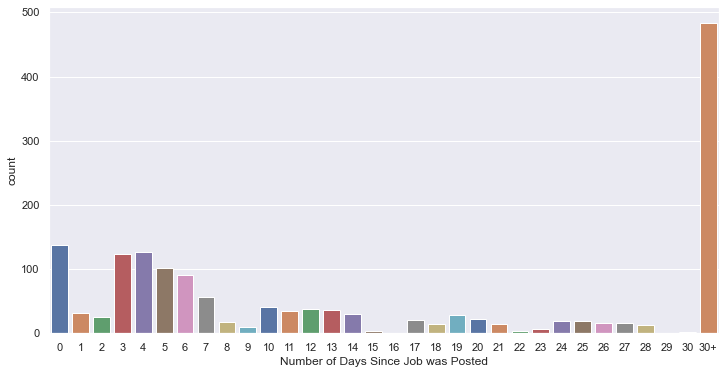

In [36]:
fig = plt.figure(figsize=(12,6))

axis_order = [str(x) for x in range(31)] + ['30+']

sns.set_theme(style="darkgrid")
ax = sns.countplot(x='int_post_date', data=postings, order=axis_order, palette='deep')
ax.set_xlabel('Number of Days Since Job was Posted')

Above is a countplot of the number of days each job has been posted. It appears that most jobs have been listed for either less than 1 week, or more than 30 days.

### Next let's take a look to see if we can gain any insights from the postings that include salary information

How can we select only cells from this column that contain values, and not NaN?

In [37]:
postings['job_salary'].isna()

0        True
1        True
2        True
3        True
4        True
        ...  
1578     True
1579    False
1580    False
1581    False
1582    False
Name: job_salary, Length: 1583, dtype: bool

The above condition will be true for any NaN entries. Let's look at the rows where this condition is false.

In [38]:
salaries_only = pd.DataFrame(postings[postings['job_salary'].isna() == False]).reset_index()

In [39]:
salaries_only

,index,job_title,company,job_location,job_summary,post_date,today,job_salary,job_url,post_date_unit,int_post_date
0,5,Senior Data Analyst,AdTech Holding,"Bengaluru, Karnataka",Work on the development of the PropellerAds pr...,EmployerActive 5 days ago,2022-07-26,"₹80,045 a month",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,day,5
1,7,Machine Learning-Python,Atos,"Pune, Maharashtra","Run machine learning tests and experiments.,De...",PostedPosted 3 days ago,2022-07-26,"₹18,00,000 - ₹22,00,000 a year",https://in.indeed.com/company/Atos/jobs/Machin...,day,3
2,12,Cloud Engineer (Remote),Julia Computing,"Remote in Bengaluru, Karnataka",Julia Computing was founded in 2015 by the cre...,EmployerActive 3 days ago,2022-07-26,"₹15,00,000 - ₹40,00,000 a year",https://in.indeed.com/company/Julia-Computing/...,day,3
3,16,Machine Learning Developer,Tech Opportunity,"Andheri, Mumbai, Maharashtra","Machine learning: 2 years (Preferred).,We have...",PostedPosted 1 day ago,2022-07-26,"₹2,50,000 - ₹6,50,000 a month",https://in.indeed.com/company/Tech-Opportunity...,day,1
4,23,Machine Learning Intern,Hacklab Solutions Private Limited,"Bengaluru, Karnataka",Work on cutting-edge problems around edge AI a...,PostedPosted 2 days ago,2022-07-26,"₹12,086 a month",https://in.indeed.com/company/Hacklab-Solution...,day,2
...,...,...,...,...,...,...,...,...,...,...,...
400,1576,Business Analyst - Manuel Testing,Larsen & Toubro Infotech Limited,"Hyderabad, Telangana",Analyze data to ensure data quality and accura...,PostedPosted 30+ days ago,2022-07-26,"₹3,00,000 - ₹14,00,000 a year",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,day,30+
401,1579,Business Analyst,Shri Ramswaroop Digital Technologies Pvt. Ltd.,"Lucknow, Uttar Pradesh",Lead efforts to gather and analyze data requir...,EmployerActive 4 days ago,2022-07-26,"₹20,000 a month",https://in.indeed.com/company/Shri-Ramswaroop-...,day,4
402,1580,Research Analyst - Central Events (Hybrid),Janes,"Bengaluru, Karnataka","Linking millions of assured data points, Janes...",PostedPosted 20 days ago,2022-07-26,"₹6,00,000 a year",https://in.indeed.com/company/Janes/jobs/Resea...,day,20
403,1581,Program Research Analyst – Sustainable Cities ...,WRI India,"Mumbai, Maharashtra",Design and implement quantitative and qualitat...,PostedPosted 18 days ago,2022-07-26,"₹8,00,000 - ₹9,00,000 a year",https://in.indeed.com/rc/clk?jk=9dfb216af07f4f...,day,18


At first glance, the currency values all appear to be displayed in Rupees, with varying time periods shown. Let's use a similar approach to what was done for the Post Date, and see if we can extract just the time period from these strings. Then we can decide on a common period and create a new column using only that period.

We will use our same checklist from the Post Date exercise.

In [40]:
salaries_only['job_salary_period'] = salaries_only['job_salary'].apply(used_entries, args=(checklist,))

In [41]:
salaries_only['job_salary_period'].head()

0    [month]
1     [year]
2     [year]
3    [month]
4    [month]
Name: job_salary_period, dtype: object

This list will be much more useful for us if we can use just the string value and remove the list. Let's write a function to do that. Since every list in this column contains only one value, we can simply use the pop function to remove the string from the list.

In [42]:
def list_to_string(lst):
    return lst.pop()

Now we must apply this to our column.

In [43]:
salaries_only['job_salary_period'] = salaries_only['job_salary_period'].apply(list_to_string)

In [44]:
salaries_only['job_salary_period'].unique()

array(['month', 'year', 'hour'], dtype=object)

Which is the most common?

Text(0.5, 0, 'Salary Period Measurement')

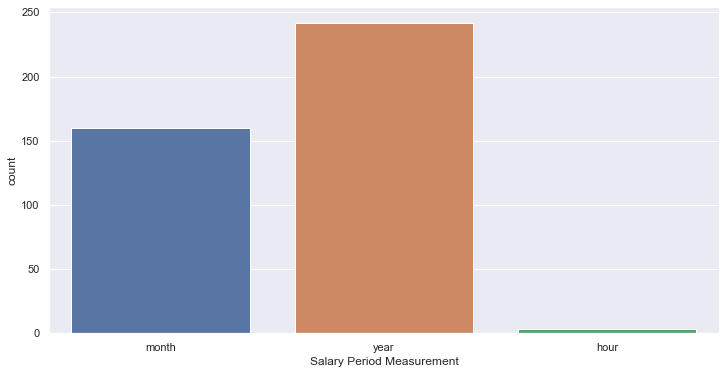

In [45]:
fig = plt.figure(figsize=(12,6))

sns.set_theme(style="darkgrid")
ax = sns.countplot(x='job_salary_period', data=salaries_only, palette='deep')
ax.set_xlabel('Salary Period Measurement')

Since most are measured in years, once we extract the numerical values, let's convert everything to an annual salary so that they can be properly compared.

In order to extract numerical values and transform them to annual values, we are going to have to make a few assumptions.
1. We will assume the number of working hours per year is the same across all job postings. Let's assume 40 hours/week for 50 weeks/year.
2. Some postings report a range of possible salary. Let's assume most people would be more concerned with the maximum potential earnings, so if an entry lists a range, we will only consider the larger value.

We will have to make some minor modifications to our get_num function. To determine where the two numbers in a range split, we will need to identify where the hyphen is in addition to the digits.

In [46]:
def get_nums(string):
    if '-' in string:
        second_half = string.split('-')[1]
        num = re.findall(r'\d+', second_half)
        return int(''.join([str(n) for n in num]))
    else:
        num = re.findall(r'\d+', string)
        return int(''.join([str(n) for n in num]))

In [47]:
get_nums('₹18,00,000 - ₹22,00,000 a year')

2200000

This function could easily be altered to extract only the lower value of the range by changing the 1 index in second_half to 0.

First, before converting everything to an annual amount, let's extract a column called "Raw Sal" that only contains the raw integer that is extracted.

In [48]:
salaries_only['raw_sal'] = salaries_only['job_salary'].apply(get_nums)

In [49]:
salaries_only['raw_sal']

0        80045
1      2200000
2      4000000
3       650000
4        12086
        ...   
400    1400000
401      20000
402     600000
403     900000
404     600000
Name: raw_sal, Length: 405, dtype: int64

Now let's write a function to check the Job Salary Period column, and apply a transformation to per year if required.

In [50]:
def to_year(amount, period):
    if period == 'month':
        return amount * 12
    elif period == 'hour':
        return amount * 40 * 50
    elif period == 'year':
        return amount  

In [51]:
salaries_only['job_salary_period'][12]

'hour'

In [52]:
salaries_only['raw_sal'][12]

1000

The above two cells will be tested as inputs below.

In [53]:
to_year(salaries_only['raw_sal'][12], salaries_only['job_salary_period'][12])

2000000

In [54]:
salaries_only['annual_salary'] = salaries_only.apply(lambda x: to_year(x['raw_sal'], x['job_salary_period']), axis=1)

In [55]:
salaries_only['annual_salary'][12]

2000000

In [56]:
sorted_salaries_only = salaries_only.sort_values(by='annual_salary', ascending=False)

Let's convert the rupees to USD.

In [57]:
def rup_to_usd(rupees):
    usd_per_rup = 0.0125
    return rupees * usd_per_rup

In [58]:
sorted_salaries_only['annual_salary_usd'] = sorted_salaries_only['annual_salary'].apply(rup_to_usd)

#### Which are the top 10 highest paying jobs?

In [59]:
sorted_salaries_only[['job_title', 'company', 'annual_salary_usd']].head(10)

,job_title,company,annual_salary_usd
229,Data Analyst,Knowledgehut solutions pvt ltd,135000.0
3,Machine Learning Developer,Tech Opportunity,97500.0
218,Machine Learning Developer,Tech Opportunity,97500.0
117,Data Science- Corporate Trainer,Synergy plus business group consultant,81250.0
391,Head Data Analytics,Strategic Talent Partner,75000.0
32,Data Scientist,BEIING,75000.0
126,Data Scientist,BEIING,75000.0
67,Data Scientist,Multirecruit,50000.0
180,Java Developer,Vision Tactics,50000.0
191,Hardware Design Verification Engineer,"SiMa.ai, MLSoC - Bangalore India",50000.0
